<a href="https://colab.research.google.com/github/623020514-5/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [ ]:
#นำเข้าโมดูลที่เราจะใช้งานสำหรับนำเข้าข้อมูลบางส่วนภายในโมดูล และสามารถใช้งานออบเจ็คได้โดยตรง
from sklearn.datasets import make_blobs 
import random,math
import numpy as np
import pandas 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn import datasets

In [ ]:
Name = 'จุฑากาญจน์ ชิงจันทร์' #กำหนดตัวแปรเป็นชื่อและรหัสนักศึกษาของเรา
ID = '6230205145'

"ในรูปแบบของการประกาศฟังก์ชันในภาษา Python นั้นจะใช้คำสั่ง **def** และหลังจากนั้น **function_name** เป็นชื่อของฟังก์ชัน และในวงเล็บ () เป็นการกำหนดพารามิเตอร์ของฟังก์ชัน พารามิเตอร์ของฟังก์ชันนั้นสามารถมีจำนวนเท่าไหร่ก็ได้หรือไม่มีก็ได้ และเช่นเดียวกับภาษาอื่นๆ ฟังก์ชันอาจจะมีหรือไม่มีการส่งค่ากลับ สำหรับฟังก์ชันที่ไม่มีการ return ค่ากลับนั้น เรามักจะเรียกว่า **โพรซีเยอร์** (Procedure)"

In [ ]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [ ]:
Data = DataGenerator(Name,ID)

020:30:20


In [ ]:
Data #แสดงข้อมูล

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,3.773747,6.061187,-9.222883,-8.954075,6.305175,0.292267,7.613113,1.220585,7.528680,-0.619801,7.349913,-2.810641,-3.111243,-1.079978,-2.554639,6.921826,-2.531105,-3.615193,-1.092670,-0.952016,3.812928,-7.987567,4.027819,-2.660919,7.456041,-7.316476,5.960466,-2.767330,-8.676474,5.676556,12.122375,30.382779
1,8.484404,-5.319557,-8.296086,-3.727046,3.417146,-2.354321,-3.198962,-5.068781,9.627884,-1.186137,7.624599,3.679341,-6.719260,9.427014,0.545413,-8.229463,0.397966,-6.307839,3.660300,-3.227168,-6.623447,9.712237,-7.599891,4.959062,2.586674,7.743150,-1.866618,-9.646674,-0.839624,-4.623120,-10.639114,-21.115602
2,-0.885176,-2.064377,-1.735326,7.347219,2.895234,-6.591421,4.689732,-1.831760,5.527787,-2.187902,-4.621077,-2.095996,-6.282829,-6.921801,-3.469243,3.709721,1.311006,8.423316,4.180588,-7.635288,8.171219,-4.399013,-8.206858,-2.485293,2.718617,-3.658901,-3.315503,8.318886,9.889534,4.934751,-4.128754,26.673756
3,0.928953,-3.955223,-7.030693,9.744129,-0.342992,1.773401,-7.167229,4.207292,3.302174,3.398619,5.902347,6.416682,-1.720844,8.569327,-9.563628,5.719072,6.597021,0.552377,3.057767,9.206791,-3.929266,-0.312406,-0.848727,5.037263,-9.414485,-8.538412,-6.457095,8.513097,-3.362707,4.125484,-7.910447,22.627419
4,-5.690987,-3.517787,-2.858825,-7.169143,-5.605544,-9.054258,6.521987,-0.913724,-7.339663,-9.462569,1.945500,-4.143945,1.903859,-0.889551,9.734788,2.465684,-0.186815,10.274393,5.035283,-7.027597,-8.250220,0.108123,6.192776,2.864375,-6.834458,-2.341450,-6.447813,-8.751939,-7.332672,5.696778,-7.035574,30.483889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.631343,-5.922440,-7.594832,-1.042551,3.699737,0.414187,-1.054134,-8.502152,8.658479,4.100714,7.837780,3.280779,-7.556245,7.024185,-1.320418,-9.951174,-0.452707,-5.646853,5.616549,-4.387339,-7.612117,9.434799,-7.439684,5.362935,5.604233,7.636980,-3.764263,-9.298095,-4.074592,-3.094425,-11.844880,-13.472124
9996,-9.164097,3.211174,-1.865883,-9.905384,-3.836890,7.568548,-5.732555,-7.434602,-5.328562,11.115293,2.945332,1.038299,0.860420,7.597590,-0.083376,4.711684,6.783715,8.115086,-7.911840,-3.839552,6.007630,-0.106223,-2.183768,3.416250,2.309178,-3.919674,4.573433,-5.643815,6.567515,-10.614089,6.422348,-51.070443
9997,-4.069899,-2.351560,-0.134604,-5.629799,-5.620890,-9.770339,6.168892,0.835266,-3.912655,-7.703638,1.361204,-3.658080,2.902530,-0.667720,7.789704,2.017346,1.698594,8.220736,4.792831,-8.864895,-8.932504,-0.911860,4.953654,-1.065717,-6.648004,-2.566931,-6.526202,-7.488712,-6.361973,5.717083,-4.703120,30.585414
9998,4.873270,-1.541458,-7.629112,2.557538,8.061374,9.162759,5.372126,1.288333,-8.305103,6.020796,3.953505,0.351103,4.409830,8.857026,-6.120125,-5.882252,-1.019697,-3.206716,-3.188903,4.414865,2.048225,-6.216080,0.629628,-5.189581,-8.773632,3.442669,10.901293,-8.050083,-2.491982,-5.548942,-3.082917,-25.744708


จากข้อมูลที่แสดงข้างต้น เราจะเห็นได้ว่าข้อมูลนั้นมีจำนวนมาก ซึ่งจะยากต่อการนำไปวิเคราะห์ หรือใช้ประโยชน์ต่อ ดังนั้นเราจะต้องทำการจัดเตรียมข้อมูล โดยการตัดตัวที่มี correlation หรือ มีความสัมพันธ์กันออกไป เพื่อลดข้อมูลที่เหมือนกัน ซึ่งไม่จำเป็นออกจากตัว DATA 

ซึ่ง ขั้นตอนเเรกที่เราควรทำนั้นคือ การเช็คขนาดของข้อมูล เพื่อที่จะนำไปกำหนดตัวแปรที่เราจะทำการตัดออกไป 

In [ ]:
Data.shape #ตรวจสอบขนาดของข้อมูล

(10000, 32)

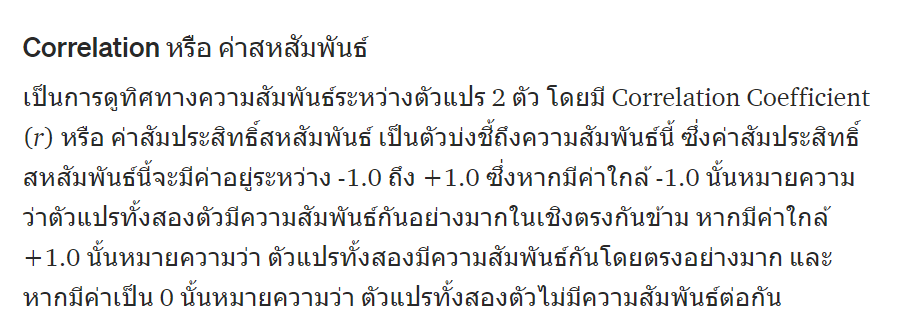

ขั้นต่อมาคือการหา หรือสร้างเมทริกซ์สหสัมพันธ์

In [ ]:
corr = np.corrcoef(Data.to_numpy().T) #คำสั่งสร้างเมทริกซ์สหสัมพันธ์

In [ ]:
corr.shape #เช็คขนาด

(32, 32)

In [ ]:
corr #ใช้คำสั่งแสดงค่าสหสัมพันธ์

array([[ 1.        ,  0.01185574, -0.01839796, ...,  0.14290484,
         0.01185574,  0.14290484],
       [ 0.01185574,  1.        ,  0.20075925, ...,  0.08729637,
         1.        ,  0.08729637],
       [-0.01839796,  0.20075925,  1.        , ..., -0.07158635,
         0.20075925, -0.07158635],
       ...,
       [ 0.14290484,  0.08729637, -0.07158635, ...,  1.        ,
         0.08729637,  1.        ],
       [ 0.01185574,  1.        ,  0.20075925, ...,  0.08729637,
         1.        ,  0.08729637],
       [ 0.14290484,  0.08729637, -0.07158635, ...,  1.        ,
         0.08729637,  1.        ]])

จะเห็นว่ามีจำนวนข้อมูลค่อนข้างมาก ดังนั้นต้องหาค่า correlation ที่ซ้ำกันโดยการวนลูป




In [ ]:
for i in range(corr.shape[0]): #ใช้คำสั่งวนลูปเพื่อดูค่าที่ซ้ำกัน พิจารณาจากค่าที่แสดงผล ถ้ามีการแสดงผลแสดงว่ามีค่าซ้ำ
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

row = 1 column = 30 corrcoef = 1.0
row = 29 column = 31 corrcoef = 1.0
row = 30 column = 1 corrcoef = 1.0
row = 31 column = 29 corrcoef = 1.0


จากผลลัพธ์จะเห็นว่ามีข้อมูลที่ซ้ำกัน จึงต้องทำการตัดข้อมูลออก 

In [ ]:
Data.iloc[:5,10:30]

,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,7.349913,-2.810641,-3.111243,-1.079978,-2.554639,6.921826,-2.531105,-3.615193,-1.092670,-0.952016,3.812928,-7.987567,4.027819,-2.660919,7.456041,-7.316476,5.960466,-2.767330,-8.676474,5.676556
1,7.624599,3.679341,-6.719260,9.427014,0.545413,-8.229463,0.397966,-6.307839,3.660300,-3.227168,-6.623447,9.712237,-7.599891,4.959062,2.586674,7.743150,-1.866618,-9.646674,-0.839624,-4.623120
2,-4.621077,-2.095996,-6.282829,-6.921801,-3.469243,3.709721,1.311006,8.423316,4.180588,-7.635288,8.171219,-4.399013,-8.206858,-2.485293,2.718617,-3.658901,-3.315503,8.318886,9.889534,4.934751
3,5.902347,6.416682,-1.720844,8.569327,-9.563628,5.719072,6.597021,0.552377,3.057767,9.206791,-3.929266,-0.312406,-0.848727,5.037263,-9.414485,-8.538412,-6.457095,8.513097,-3.362707,4.125484
4,1.945500,-4.143945,1.903859,-0.889551,9.734788,2.465684,-0.186815,10.274393,5.035283,-7.027597,-8.250220,0.108123,6.192776,2.864375,-6.834458,-2.341450,-6.447813,-8.751939,-7.332672,5.696778


**2. ทำการ clustering data แล้วทำ visualize ให้ข้อมูลออกมาในรูปแบบ 2 มิติ**

โดยเราจะใช้วิธี Kmean คือการจัดกลุ่มข้อมูลจากการวัดระยะห่างระหว่างข้อมูล

ขั้นเเรก Import


```
from sklearn.cluster import KMeans
```



ขั้นสอง Define

In [ ]:
kmeans = KMeans(n_clusters=3,random_state=2021) #กำหนดเคมีนให้สุ่มเป็นจุดเดียวกัน

ขั้นสาม Fit-transfrom

In [ ]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

ขั้นที่สี่ คำนวณจุดค่า Kmean

In [ ]:
kmeans.cluster_centers_ #คำนวณจุด cluter centers ของข้อมูล ด้วยวิธี K-means clustering

array([[ 1.02832062e+00, -3.39348801e+00, -5.43401124e-01,
         2.31895603e+00, -2.61186597e+00,  3.10440922e+00,
         5.20947997e+00, -1.60333380e+00, -3.30975440e+00,
        -3.65944441e+00,  2.56940338e+00, -1.13223497e+00,
         1.83263251e+00,  2.21162135e+00,  6.50933415e+00,
         1.96181243e+00, -3.60606622e-01,  4.46879453e+00,
         5.22390188e+00, -2.05593008e+00, -1.19518278e+00,
         1.47839853e+00,  4.07043215e+00,  1.46245661e+00,
         3.65428109e+00, -1.97333539e-01, -2.30701430e+00,
        -5.34254212e-01, -2.29421964e+00,  6.78524442e+00,
        -6.78697603e+00,  3.59262221e+01],
       [ 1.30387370e+00,  2.69301182e+00, -2.18515548e+00,
         1.49719982e+00,  1.30921003e+00, -1.64313902e+00,
         2.67657253e+00,  2.09687483e+00,  3.99283759e+00,
        -2.23265619e+00,  6.79411292e-01, -4.01163705e-01,
        -1.34981230e+00, -1.14381993e+00, -3.93304894e+00,
        -4.53765999e-01, -4.11889093e-02,  1.74974350e+00,
         1.50

ขั้นที่ 5 ทดสอบการจัดกลุ่มด้วย Kmean

In [ ]:
y = kmeans.predict(Data)
y

array([1, 2, 1, ..., 0, 2, 1], dtype=int32)

ขั้นที่ 6 ทำ PCA เพื่อลด Dimension

In [ ]:
pca = PCA(n_components=2) #กำหนดค่า Dimension = 2

In [ ]:
new_pca = pca.fit_transform(Data)

In [ ]:
import matplotlib #เพื่อใช้ในการวาดกราฟ

In [ ]:
matplotlib.rcParams['figure.figsize']=[10,15] #กำหนดขนาดของกราฟ

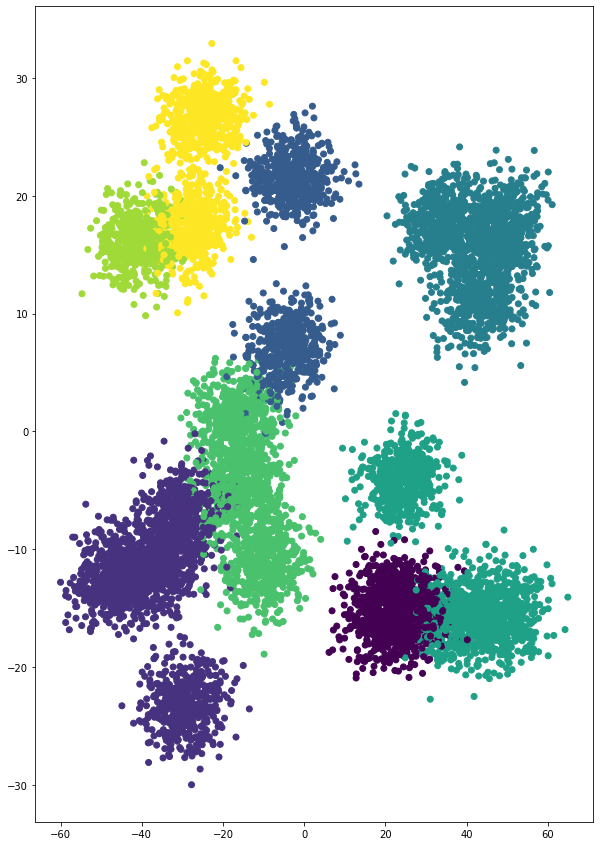

In [ ]:
kmeans = KMeans(random_state=2021) #ไม่ได้กำหนดจำนวนกลุ่มในการแบ่งกลุ่ม
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

จะเห็นว่าเมื่อลองวาดกราฟออกมา กราฟมีการจัดกลุ่ม ซึ่งสามารถพิจารณาได้จากสี นั่นคือ มีกลุ่มข้อมูลประมาณ 8 กลุ่ม ซึ่งมีมากเกินไป ดังนั้นเราจึงต้องหาจำนวนการแบ่งกลุ่ม หรือ ค่า k ที่เหมาะของ Data

**วิธีที่ 1 วิธีการหาค่า k ด้วยวิธี  The elbow method**

ขั้นตอกแรก หาค่า SSE or Sum of Squared error เพื่อดูความคลาดเคลื่อน

In [ ]:
kmeans.inertia_

6571670.621149184

In [ ]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    XX = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [ ]:
SSE #เเสดงค่า SSE

[21043525.2946053,
 12533065.08609684,
 10989012.264080929,
 9863756.63160429,
 9019631.747012235,
 8248184.2299705325,
 7377188.501246718,
 6571670.621149184]

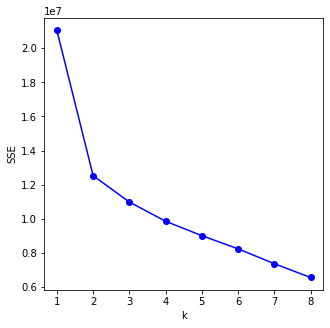

In [ ]:
#ทำการนำค่า SSE ที่ได้มา plot กราฟเพื่อดูว่ามีกี่ k กลุ่ม
matplotlib.rcParams['figure.figsize']=[5,5]
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE');

จากกราฟ ซึ่งเราจะทำการพิจารณาจากระยะห่างระหว่างจุด จะเห็นว่าจุด 1-2 มีระยะห่างอีกแบบ แต่ตั้งแต่จุดสองเป็นต้นไประยะห่างระหว่างจุดมีค่าใกล้เคียงกัน ดังนั้น ค่า K ที่เหมาะสม คือ 2 กลุ่ม 

In [ ]:
matplotlib.rcParams['figure.figsize']=[15,20] #กำหนดขนาดกราฟ

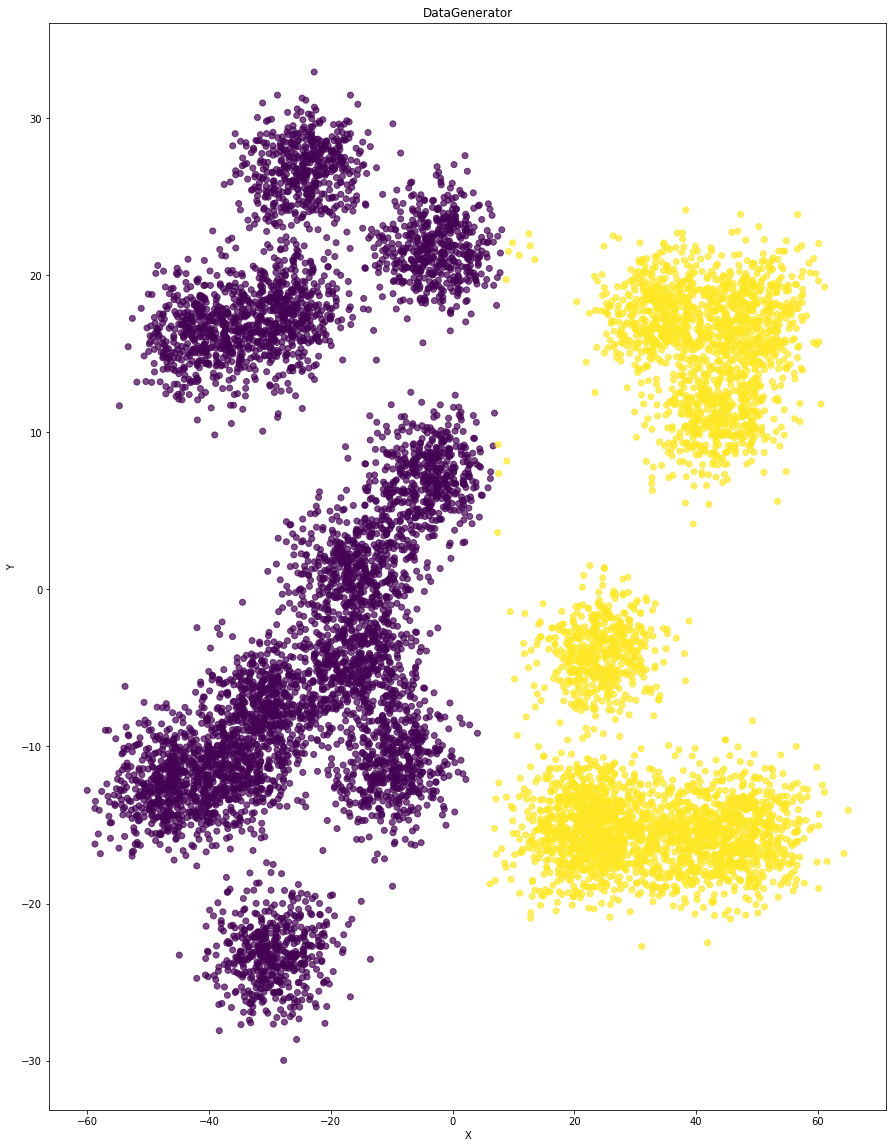

In [ ]:
kmeans = KMeans(n_clusters = 2,random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

**วิธีที่ 2 วิธีการหาค่า k ด้วยวิธี The silhouette coefficient**

ขั้นแรก Import


```
from sklearn import metrics
```



In [ ]:
from sklearn import metrics

In [ ]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

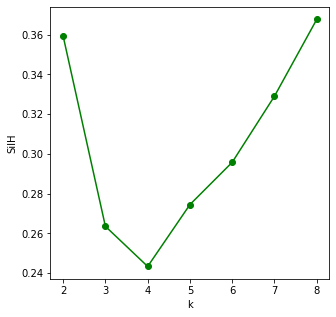

In [ ]:
matplotlib.rcParams['figure.figsize']=[5,5]
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('SilH');

จากกราฟข้างต้นจะเห็นว่ามีระยะห่างที่แตกต่างกันทั้งหมด 3 แบบ ดังนั้นค่า K ที่เหมาะสม คือ 3 กลุ่ม

ลองวาดค่า k = 3

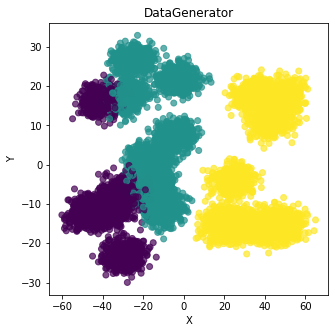

In [ ]:
kmeans = KMeans(n_clusters = 3,random_state=2021) #กำหนด k=3
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

จากรูปกราฟข้างต้นจะเห็นว่ายังมีข้อมูลที่ทับซ้อนกันอยู่ อาจเพราะข้อมูลมีจำนวนมากเกินไป

**3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ**

จากข้อ 2 เนื่องจากข้อมูลมีจำนวนมาก จึงเกิดการทับซ้อน ดังนั้นจะทำการลด  Dimension ด้วยวิธี MDS

##**MDS**

ขั้นแรก Import


```
from sklearn.manifold import MDS
```



ขั้นสอง Define

In [ ]:
mds = MDS(n_components=2) 

ขั้นสาม fit transform

In [ ]:
new_mds = mds.fit_transform(Data)

ขั้นที่ 4 ทำ Kmean หรือ เป็นการจัดกลุ่มจากการวัดระยะห่างในการจัดกลุ่ม ระหว่างจุดข้อมูล

In [ ]:
kmeans_2 = KMeans(n_clusters=3,random_state=2021)
kmeans_2.fit(Data)
g = kmeans_2.predict(Data)

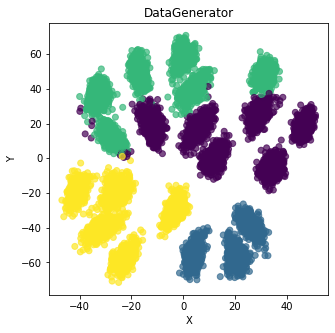

In [ ]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

**4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.**

ซึ่งเราจะทำการเปรียบเทียบจากกราฟ

**กราฟที่ 1 กราฟ PCA**

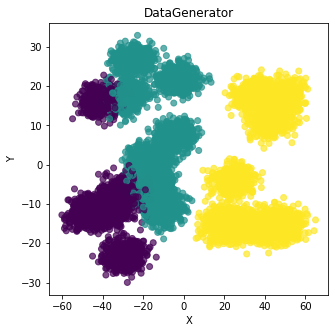

In [ ]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

**กราฟที่ 2 กราฟ MDS**

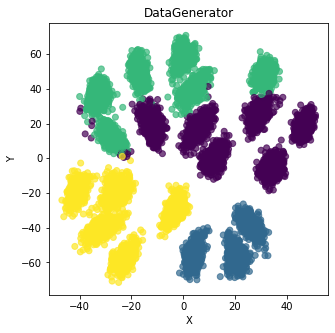

In [ ]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');